ASSESSMENT BLUE LABEL TELECOM

# MY DATA SCIENCE FRAMEWORK



There are many ways to approach a predictive analytics problem. I have to confess I am  not a great statistician or the world's best data scientist (obviously lol).As a person from a finance background I would want to believe though that I am one of the very few data scientists who are able to truly understand the business problems at hand and use data science only as a tool to solve them.The emphasis of my work will be to therefore not be to build the most statistical model or machine learning algorithm but to try to delve the most business value from this rather limited dataset.

Step 1:Define the problem 

Step 2:Gather the data

Step 3:Exploratory Data Analysis 

Step 4:Data Cleaning 

Step 5:Feature Engineering

Step 6:Model and Validate the Model

Step 7:Validate the model 

Step 8:Actionable Insights


#  Define the problem

We are given a dataset with classical binary classification target.The main goal of the business is to accurately predict customers who are leaving as it will cost the business R20000 if a customer leaves and only R1000 if we incorrectly classify a customer who is staying as leaving. This huge difference is very weird business condition which should be investigated further ,at at a very basic level of layman modelling if we just classify everyone as belonging to the target class it would cost the Blue Label Telecom   R943000(?).It will be hard job building a predictive model to bit this simple baseline model!

For the purposes of this model I will take this as churn prediction problem.Churn is when an existing customer ends a relationship with the business.In most cases however just predicting if a customer is going to leave a telecommunications company next month does not really help the company. In that scenario the real problem that what we really want to know is why are our customers leaving and how can we stop them way before they even think of leaving.In this notebook we will look more at the drivers than the actual target event.

# Gather the Data


Once we have determined the problem the next thing is to identify the necessary data that we might need. In the practial world as with many other steps this is an iterative proceess which we can on doing throughout the modelling process. We will continually seek data from different sources which normally the client will not think of like credit bureau,social media etc.In this case however we are already given the data.


In [14]:
# set working directory
import os;
os.chdir('c:/Users/Dumisani Chanda/Documents/new_git/Assessments-master/Assessments-master/Data Science Assessment') 
print (os.getcwd())
#lets read the data
import pandas as pd#load the data
assessment = pd.read_csv('assessment_data.csv')


c:\Users\Dumisani Chanda\Documents\new_git\Assessments-master\Assessments-master\Data Science Assessment


#  Exploratory Data Analysis 

This is probably the most time consuming and draining excercise.The goal of this step is to understand the data throughly so that we can have a clean set of variables(features) which capture most of the information in the data set.We want to explore the data and be able to see relationships and patterns which we can use to identify the levers which drive the churn.As we do this we will see problems in the data  which we have to clean.Lastly we also create new features from the patterns and relationships that will help us explain predict and and explain the target class. 

In [89]:
#lets load the libriaries and stlyes 
import numpy as np #foundational package for scientific computing
import matplotlib.pyplot as plt #collection of functions for scientific and publication-ready visualization
import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import seaborn as sns
sns.set(style="white")
%matplotlib inline  
import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook


#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [90]:
dataset = assessment.copy()

In [91]:
#quick exploration
dataset.head(10)


,target_var,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,1,211.3375,0,0,bigollo-16,blue,29.0000,1,sigma,112.877941
1,1,151.5500,2,1,cantor-33,pink,0.9167,1,sigma,60.291423
2,0,151.5500,2,1,cantor-33,blue,2.0000,1,sigma,143.794103
3,0,151.5500,2,1,cantor-33,pink,30.0000,1,sigma,131.278352
4,0,151.5500,2,1,cantor-33,blue,25.0000,1,sigma,204.415716
5,1,26.5500,0,0,euler-23,pink,48.0000,1,sigma,75.970582
6,1,77.9583,0,1,descrates-18,blue,63.0000,1,sigma,125.853521
7,0,0.0000,0,0,allen-47,pink,39.0000,1,sigma,103.637401
8,1,51.4792,0,2,cantor-112,blue,53.0000,1,sigma,94.425637
9,0,49.5042,0,0,NaN,pink,71.0000,1,gamma,85.687636


In [92]:
#... now from the bottom 
dataset.tail(10)

,target_var,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
1299,0,14.4542,0,1,NaN,pink,27.0,3,gamma,160.467031
1300,1,14.4542,0,1,NaN,blue,15.0,3,gamma,150.457204
1301,0,7.2250,0,0,NaN,pink,45.5,3,gamma,187.296476
1302,0,7.2250,0,0,NaN,pink,NaN,3,gamma,38.320610
1303,0,14.4583,0,0,NaN,pink,NaN,3,gamma,138.922892
1304,0,14.4542,0,1,NaN,blue,14.5,3,gamma,122.071321
1305,0,14.4542,0,1,NaN,blue,NaN,3,gamma,100.239701
1306,0,7.2250,0,0,NaN,pink,26.5,3,gamma,70.567035
1307,0,7.2250,0,0,NaN,pink,27.0,3,gamma,94.718973
1308,0,7.8750,0,0,NaN,pink,29.0,3,sigma,102.025126


In [93]:
#....and lastly randomly
dataset.sample(10)

,target_var,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
331,0,11.5000,0,0,NaN,pink,18.0,2,sigma,72.377711
407,1,26.0000,0,1,NaN,blue,29.0,2,sigma,114.039098
1254,1,0.0000,0,0,NaN,pink,25.0,3,sigma,-57.341836
164,1,26.5500,0,0,NaN,pink,35.0,1,gamma,51.741073
573,1,10.5000,0,0,euler-112,blue,27.0,2,sigma,67.246865
1032,0,7.7500,0,0,NaN,pink,NaN,3,qoph,120.393298
433,0,10.5000,0,0,NaN,pink,30.0,2,sigma,131.663000
1168,0,7.5750,0,0,NaN,pink,NaN,3,sigma,74.246335
1085,0,7.3125,0,0,NaN,pink,NaN,3,sigma,114.058611
1227,0,9.8375,0,0,NaN,blue,22.0,3,sigma,139.110380


In [94]:
dataset.dtypes

target_var      int64
feature_1     float64
feature_2       int64
feature_3       int64
feature_4      object
feature_5      object
feature_6     float64
feature_7       int64
feature_8      object
feature_9     float64
dtype: object

Observations

-we have 3 columns which have object data type which is basically strings or categories in python so need to see if we can extract features from these strings and categorical features

-we can also convert them to numeric as most python models want numeric data only



In [95]:
print((dataset == 0).mean())# checking for zeros 


target_var    0.618029
feature_1     0.012987
feature_2     0.765470
feature_3     0.680672
feature_4     0.000000
feature_5     0.000000
feature_6     0.000000
feature_7     0.000000
feature_8     0.000000
feature_9     0.000000
dtype: float64


Observations

1.in the target column we have 63.3% of zeros(the non event)which is very high ammount considering in our problem our main goal is to predict the target event.Options to fix this later will be oversampling the target event(i.e ones) to give our model more data to train  on.
#..... bit befor e we do that we are going to do some EDA(Eplaratory Data Anaylysis) to see the variable which are correlated to the target

2.we have two columns with worringly has high number of zeros i.e feature_2(76.2178%) and feature_3 (68.4%).We need to invistagate through EDA if these zeros are related with the target variable or a particualar variable. We also need to invstigate why the zeros are might be correlated with that others variables and probably help identify whats causing them.

3.will our base model improve, decrease or remain the same if we delete these high zero percentage columns ,or if we impute impute them as missings and create an indicator will it improve our model


In [96]:
print(dataset.isnull().mean())#checking nulls


target_var    0.000000
feature_1     0.000764
feature_2     0.000000
feature_3     0.000000
feature_4     0.774637
feature_5     0.000000
feature_6     0.200917
feature_7     0.000000
feature_8     0.001528
feature_9     0.000000
dtype: float64


Observations:

1.feature_4 has a lot of missings which again we need investigate.
most data science books encourage deleting columns with more than 50% missing data because if we replace the more than 50% missings with we are basically creating our own column

2.we need to do similar EDA on this missings like what we are going to do on the high zero columns as described above i.e are customers with missing values more likely to churn or not, what variables are correlated with missing values so that we can find source and fix if for future modeling.


In [97]:
print(dataset.nunique())# checking the levels of your columns in the dataset


target_var       2
feature_1      281
feature_2        8
feature_3        7
feature_4      181
feature_5        2
feature_6       98
feature_7        3
feature_8        3
feature_9     1309
dtype: int64


Observations

1.feature_4  is a categorical value with an unsually high number of levels this will make undestanding this column more difficult as there will be more splits

2.feature_1,feature_6 and feature_9 are numerical values which we may want to bin to see the groups which contribute more to the the target value


In [98]:
print(dataset.isnull().mean())#checking nulls again


target_var    0.000000
feature_1     0.000764
feature_2     0.000000
feature_3     0.000000
feature_4     0.774637
feature_5     0.000000
feature_6     0.200917
feature_7     0.000000
feature_8     0.001528
feature_9     0.000000
dtype: float64


before we do the EDAs we need to  pre-process our data and create some new features and restructure our dataset to make our visualizations and analysis more insightful.Therefore the EDA step is heavily intertwined with the Feature Engineering step.

In [99]:

#insights
#1.feature_4  is a categorical value with an unsually high number of levels this will make undestanging this column more difficult as there will be more splits
#2.feature_1,feature_6 and feature_9 are numerical values which we want to bin to see the groups which contrubute more to the the target value
#create categories or indicators for missing values and zeros
dataset.dtypes


dataset['feature_4_numbers'] = dataset['feature_4'].str.split("-", expand=True)[1].str.split("-", expand=True)#column with only the numbers part from feature_4
dataset['feature_4_names'] = dataset['feature_4'].str.split("-", expand=True)[0].str.split("-", expand=True)#column with only the strings  part from feature_4


dataset["feature_4_names"] = dataset["feature_4_names"].fillna("missing")


dataset['feature_4_numbers'] = pd.to_numeric(dataset['feature_4_numbers'], errors='coerce')


dataset['feature_4_numbers_bin'] = pd.qcut(dataset['feature_4_numbers'], 8, labels=False)

dataset['feature_4_numbers'] = dataset['feature_4'].str.split("-", expand=True)[1].str.split("-", expand=True)#column with only the numbers part from feature_4
dataset['feature_4_names'] = dataset['feature_4'].str.split("-", expand=True)[0].str.split("-", expand=True)#column with only the strings  part from feature_4
#remeber the feature_4 had an unsually high number of missings, lets a create a catehory for these missings so we can identify them in our graphs and invistigate them
dataset["feature_4_names"] = dataset["feature_4_names"].fillna("missing")



In [100]:
#lets continue by binning the rest of the numerical columns(i.e feature_1,feature_6 and feature_9)
dataset['feature_1_bins'] = pd.qcut(dataset['feature_1'], 10, labels=False)
dataset['feature_6_bins'] = pd.qcut(dataset['feature_6'], 10, labels=False)
dataset['feature_9_bins'] = pd.qcut(dataset['feature_9'], 10, labels=False)



In [101]:
#lets create indicators for missing and zero rows for better visualisations 
#....this is also feature engineering whc
dataset['feature_1'+"_miss"] = dataset['feature_1'].isnull().astype('int8')

dataset['feature_6'+"_miss"] = dataset['feature_6'].isnull().astype('int8')
dataset['feature_4_numbers'+"_miss"] = dataset['feature_4_numbers'].isnull().astype('int8')
#indicators for zeros
dataset['feature_1_zeros'] = np.where(dataset['feature_1']== 0 , 1, 0)

dataset['feature_2_zeros'] = np.where(dataset['feature_2']== 0 , 1, 0)
dataset['feature_3_zeros'] = np.where(dataset['feature_3']==0 , 1, 0)
dataset['feature_6_zeros'] = np.where(dataset['feature_6']== 0 , 1, 0)
dataset['feature_4_numbers_zeros'] = np.where(dataset['feature_4']== 0 , 1, 0)

In [102]:
print(dataset.isnull().mean())#checking nulls


target_var                 0.000000
feature_1                  0.000764
feature_2                  0.000000
feature_3                  0.000000
feature_4                  0.774637
feature_5                  0.000000
feature_6                  0.200917
feature_7                  0.000000
feature_8                  0.001528
feature_9                  0.000000
feature_4_numbers          0.784568
feature_4_names            0.000000
feature_4_numbers_bin      0.784568
feature_1_bins             0.000764
feature_6_bins             0.200917
feature_9_bins             0.000000
feature_1_miss             0.000000
feature_6_miss             0.000000
feature_4_numbers_miss     0.000000
feature_1_zeros            0.000000
feature_2_zeros            0.000000
feature_3_zeros            0.000000
feature_6_zeros            0.000000
feature_4_numbers_zeros    0.000000
dtype: float64


In [103]:

dataset.dtypes

target_var                   int64
feature_1                  float64
feature_2                    int64
feature_3                    int64
feature_4                   object
feature_5                   object
feature_6                  float64
feature_7                    int64
feature_8                   object
feature_9                  float64
feature_4_numbers           object
feature_4_names             object
feature_4_numbers_bin      float64
feature_1_bins             float64
feature_6_bins             float64
feature_9_bins               int64
feature_1_miss                int8
feature_6_miss                int8
feature_4_numbers_miss        int8
feature_1_zeros              int32
feature_2_zeros              int32
feature_3_zeros              int32
feature_6_zeros              int32
feature_4_numbers_zeros      int32
dtype: object

## Visualisations
    

In [104]:
import warnings
warnings.filterwarnings('ignore')

In [105]:
print((dataset.target_var == 1).mean())# the average churners for the whole dataset


0.3819709702062643


In [106]:
print(dataset.nunique())# checking the levels of your columns in the dataset


target_var                    2
feature_1                   281
feature_2                     8
feature_3                     7
feature_4                   181
feature_5                     2
feature_6                    98
feature_7                     3
feature_8                     3
feature_9                  1309
feature_4_numbers           105
feature_4_names               9
feature_4_numbers_bin         8
feature_1_bins               10
feature_6_bins               10
feature_9_bins               10
feature_1_miss                2
feature_6_miss                2
feature_4_numbers_miss        2
feature_1_zeros               2
feature_2_zeros               2
feature_3_zeros               2
feature_6_zeros               1
feature_4_numbers_zeros       1
dtype: int64


In [107]:
dataset.dtypes# checking data type

target_var                   int64
feature_1                  float64
feature_2                    int64
feature_3                    int64
feature_4                   object
feature_5                   object
feature_6                  float64
feature_7                    int64
feature_8                   object
feature_9                  float64
feature_4_numbers           object
feature_4_names             object
feature_4_numbers_bin      float64
feature_1_bins             float64
feature_6_bins             float64
feature_9_bins               int64
feature_1_miss                int8
feature_6_miss                int8
feature_4_numbers_miss        int8
feature_1_zeros              int32
feature_2_zeros              int32
feature_3_zeros              int32
feature_6_zeros              int32
feature_4_numbers_zeros      int32
dtype: object

In [108]:
#lets start by looking at a univariate distrubutions of the variables
#dataset.hist(figsize=(15,20));

We are now going to start a bivariate analysis of all the columns we have against the target event to see which columns and categories are contributing the most to churn

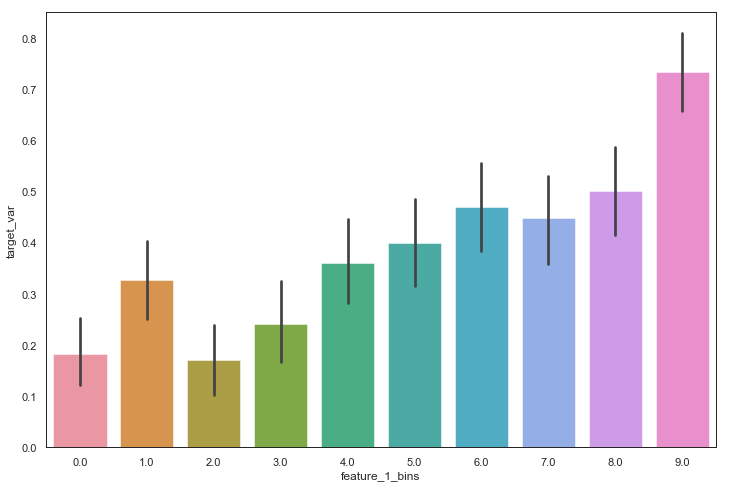

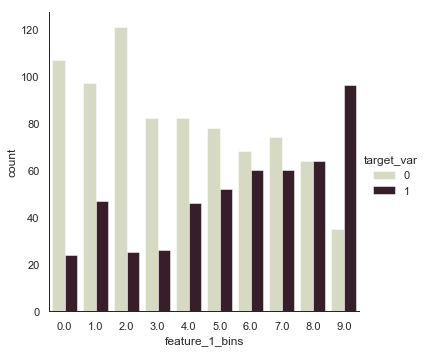

In [109]:
#feature 1
sns.barplot(x = 'feature_1_bins', y = 'target_var', data=dataset);
sns.catplot(x="feature_1_bins", kind="count",hue ="target_var",palette="ch:.5", data=dataset);



OBSERVATIONS

* Feature_1 is a continuous variable to visualisations so we binned it to see a clear trend. We could have specified the bins in the above code without creating the binned variable, this way over gives us an option to later run a different version of the models with binned variables not the continuous variables.

* From the above graph we can see there is that as the bins increase the likely would of churning increases with one or two exceptions. Those in the last bin contains about  72% churners which is almost double the average 38% in the dataset. We will seek to capture this information when we do feature engineering.

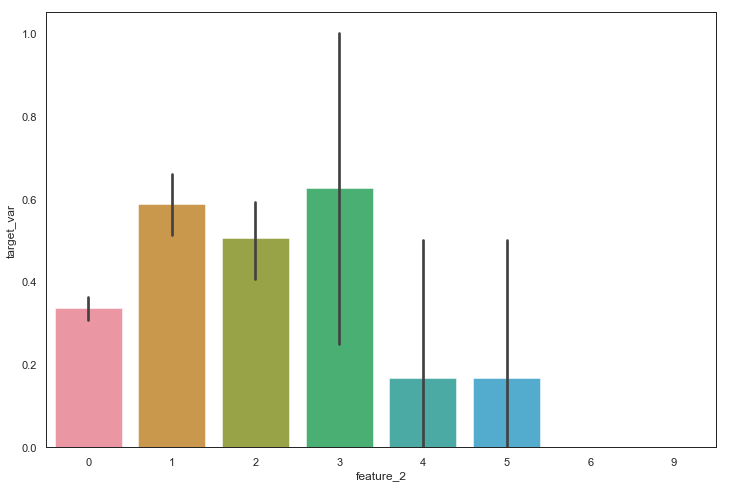

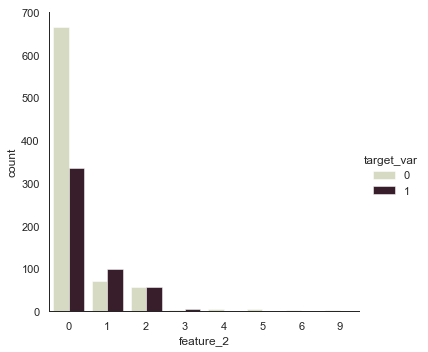

In [110]:
#feature_2
sns.barplot(x = 'feature_2', y = 'target_var', data=dataset);
sns.catplot(x="feature_2", kind="count",hue ="target_var",palette="ch:.5", data=dataset);


* Feature_2 is an integer with 7 levels. The last 3 levels have a high variance in the average mean represented by the long  black lines on top of the graphs. This suggest that in these 3 last levels the churners don't have a clear pattern hence the high variance

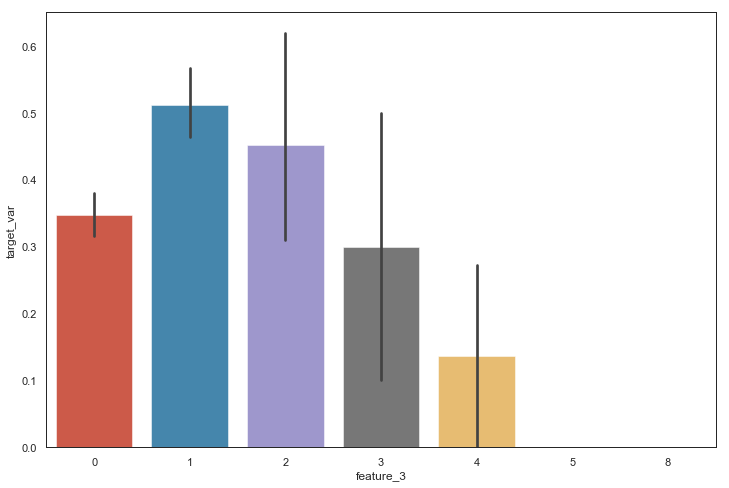

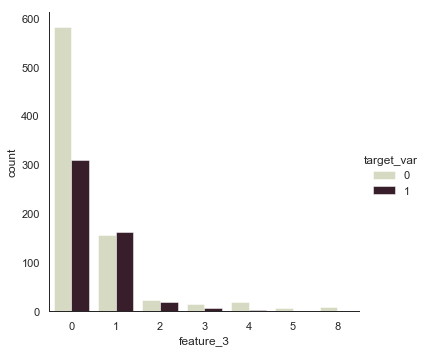

In [111]:
#feature_3
sns.barplot(x = 'feature_3', y = 'target_var', data=dataset);
sns.catplot(x="feature_3", kind="count",hue ="target_var",palette="ch:.5", data=dataset);



* From the previous explorations we know that feature_3 is an integer with 7 different levels.With the exception of the level 0 there seems to be a general decrease  in the average churners as the the levels increase. Again we will seek to bring this information to the surface with some feature engineering.

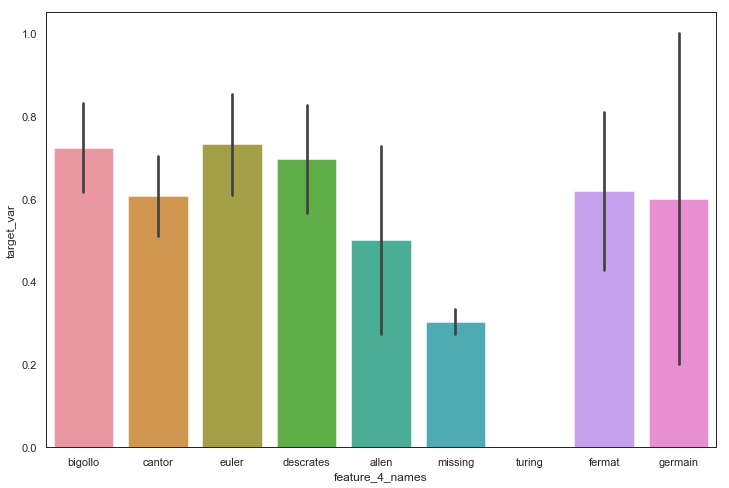

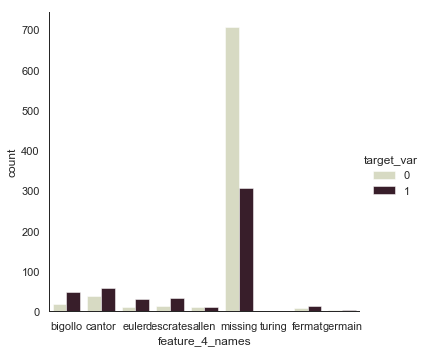

In [112]:
#feature_4_names
sns.barplot(x = 'feature_4_names', y = 'target_var', data=dataset);
sns.catplot(x="feature_4_names", kind="count",hue ="target_var",palette="ch:.5", data=dataset);


Observations

* This is the column we created from feature_4 which contains the strings only.These strings now represent different categories. However it must be remembered that this columns contains a high amount of ,missing values (77%) so any info must be taken as a pinch of salt.

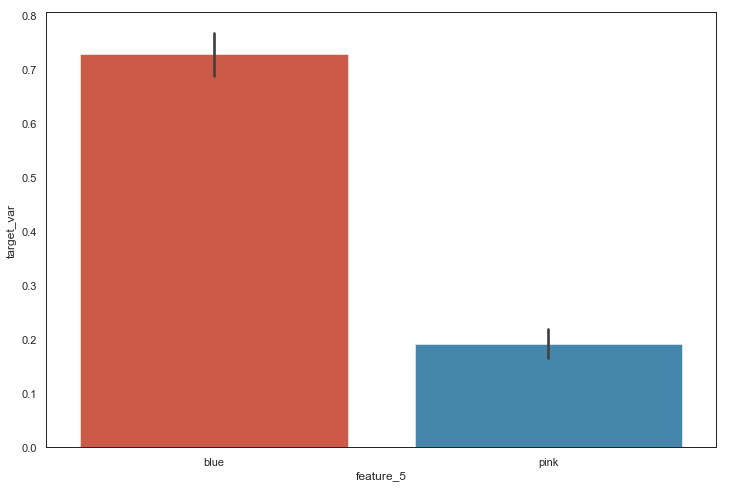

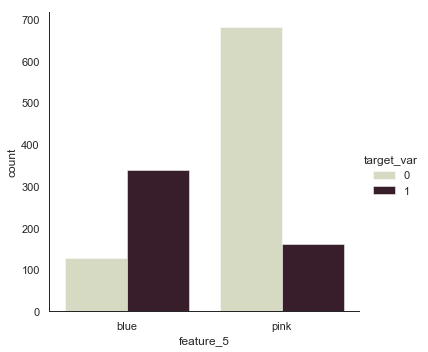

In [113]:
sns.barplot(x = 'feature_5', y = 'target_var', data=dataset); sns.catplot(x="feature_5", kind="count",hue ="target_var",palette="ch:.5", data=dataset);



* there are two variables blue and pink with the category pink more twice likely to churn (73.45%) than the average of churn of 38.492% 
* we can combine blue with another category which is also highly correlated to the target to the target
* however there is a lower number of people in category blue than pink so this will probably be not be super predictive

* I HOPE WE GET THE IDEA ON WHAT WE ARE LOOKING FOR IN THESE GRAPHS, FOR THE SAKE OF TIME I WILL NOT BE WRITING THE OBSERVATIONS
ANYMORE

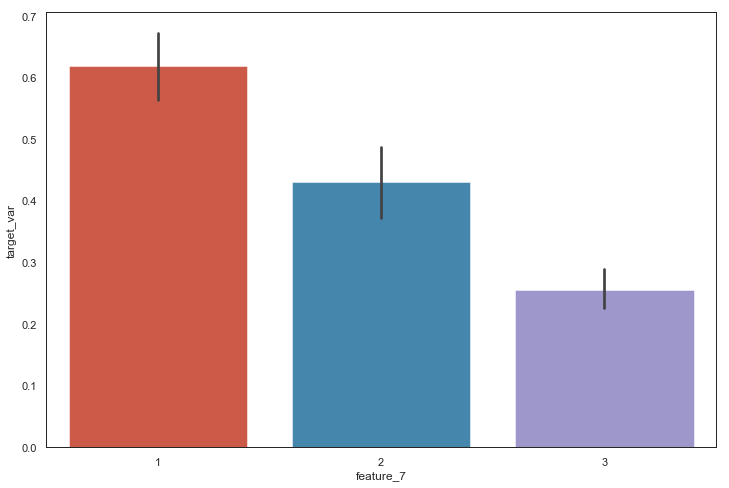

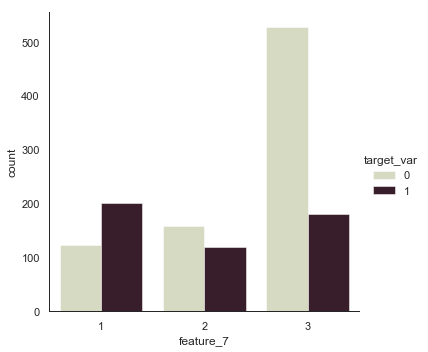

In [114]:
sns.barplot(x = 'feature_7', y = 'target_var', data=dataset);
sns.catplot(x="feature_7", kind="count",hue ="target_var",palette="ch:.5", data=dataset);


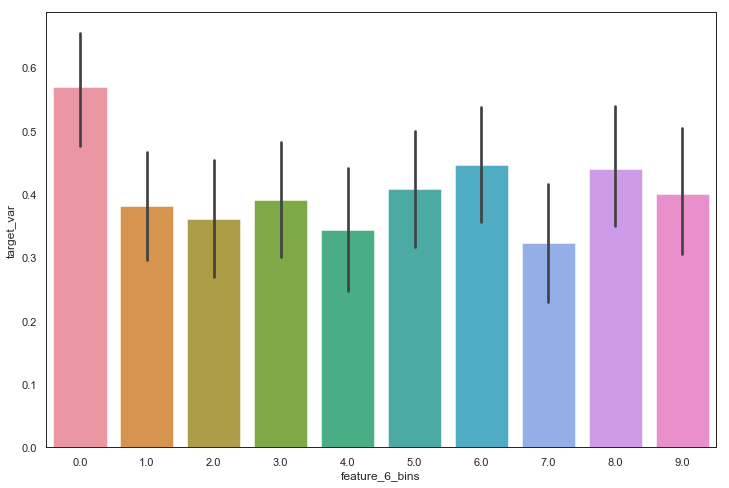

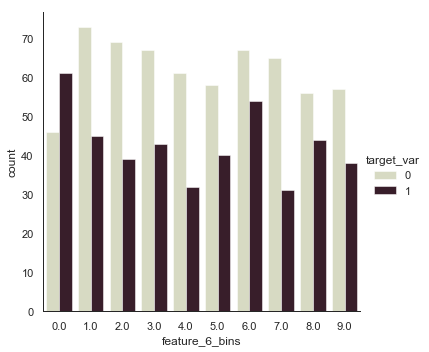

In [115]:
sns.barplot(x = 'feature_6_bins', y = 'target_var', data=dataset);
sns.catplot(x="feature_6_bins", kind="count",hue ="target_var",palette="ch:.5", data=dataset);


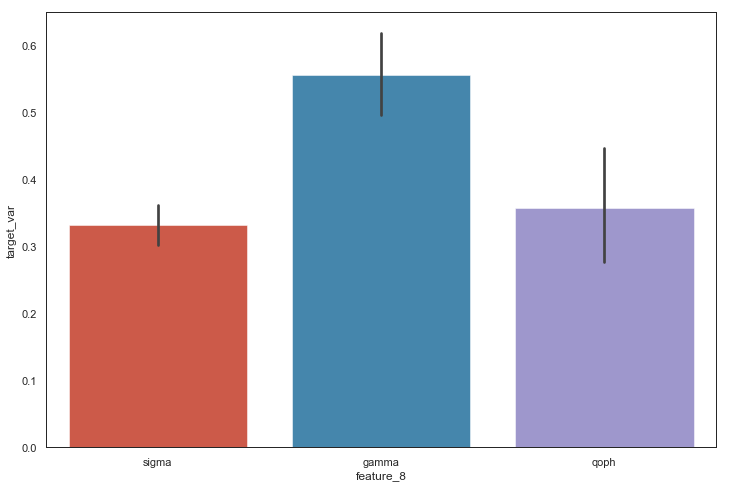

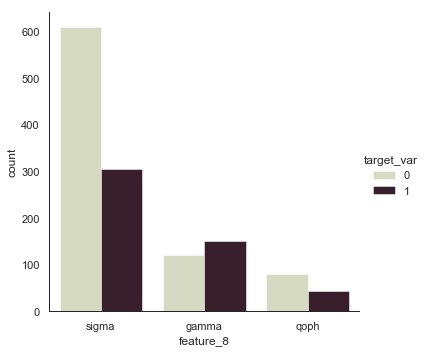

In [116]:
sns.barplot(x = 'feature_8', y = 'target_var', data=dataset);
sns.catplot(x="feature_8", kind="count",hue ="target_var",palette="ch:.5", data=dataset);


In [117]:
#sns.relplot(x="feature_9", y="feature_2", hue="target_var", size="feature_7",
            #sizes=(40, 400), alpha=.5, palette="muted",
            #height=6, data=dataset);




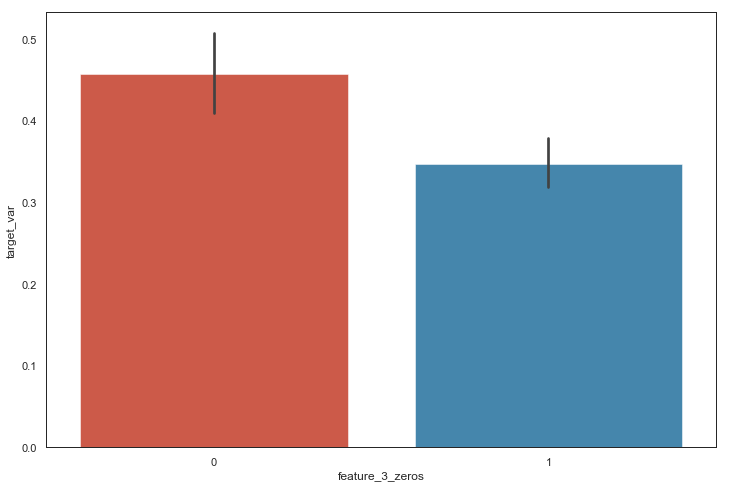

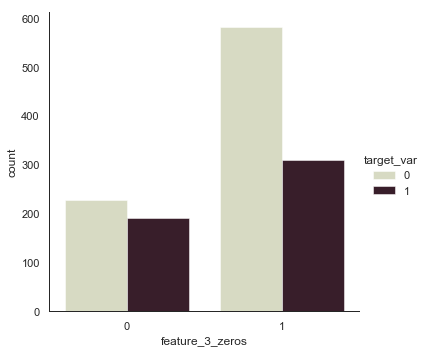

In [118]:
sns.barplot(x = 'feature_3_zeros', y = 'target_var', data=dataset);
sns.catplot(x="feature_3_zeros", kind="count",hue ="target_var",palette="ch:.5", data=dataset);


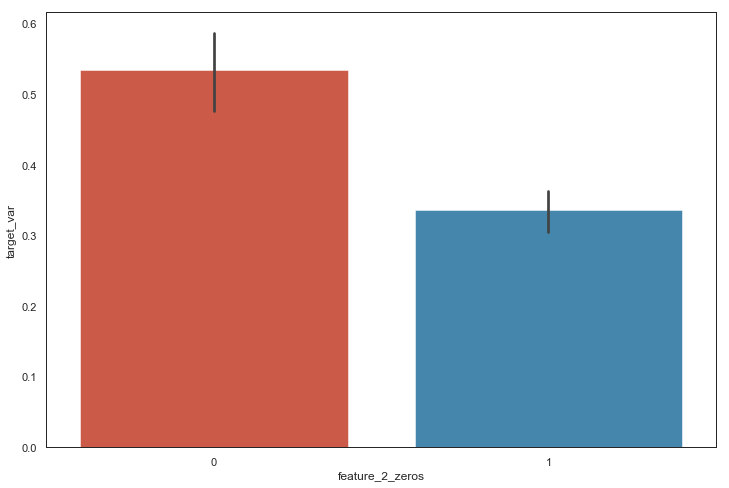

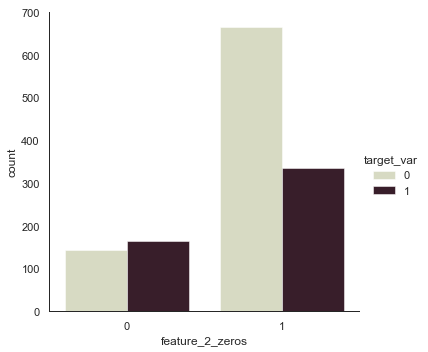

In [119]:
sns.barplot(x = 'feature_2_zeros', y = 'target_var', data=dataset);
sns.catplot(x="feature_2_zeros", kind="count",hue ="target_var",palette="ch:.5", data=dataset);


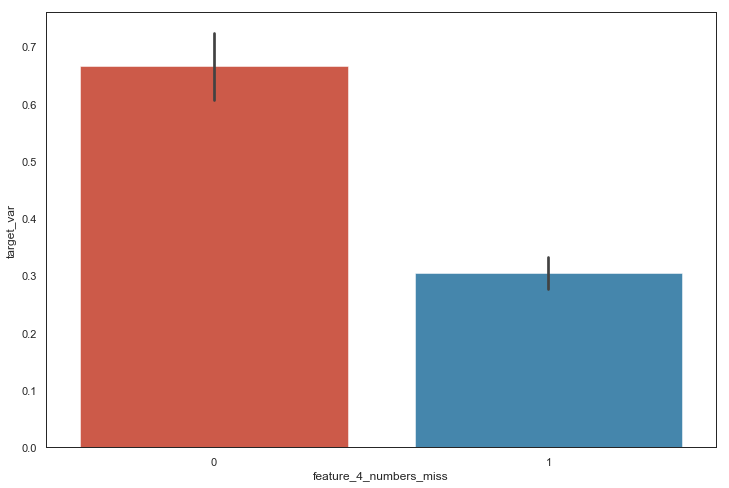

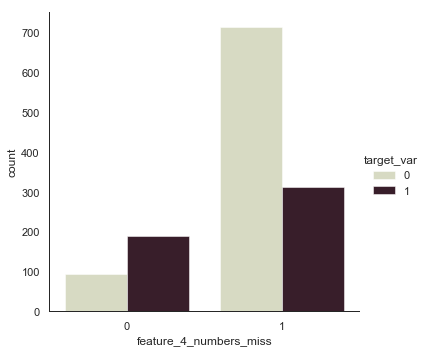

In [120]:
sns.barplot(x = 'feature_4_numbers_miss', y = 'target_var', data=dataset);
sns.catplot(x="feature_4_numbers_miss", kind="count",hue ="target_var",palette="ch:.5", data=dataset);


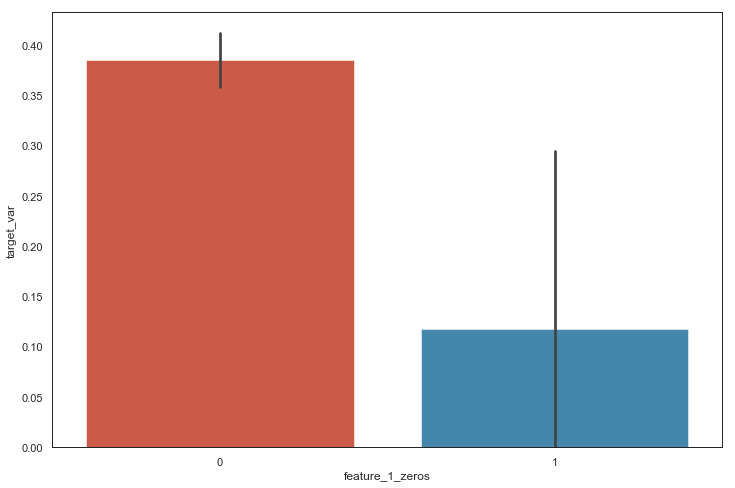

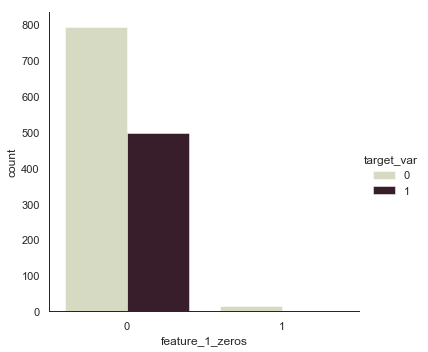

In [121]:
sns.barplot(x = 'feature_1_zeros', y = 'target_var', data=dataset);
sns.catplot(x="feature_1_zeros", kind="count",hue ="target_var",palette="ch:.5", data=dataset);


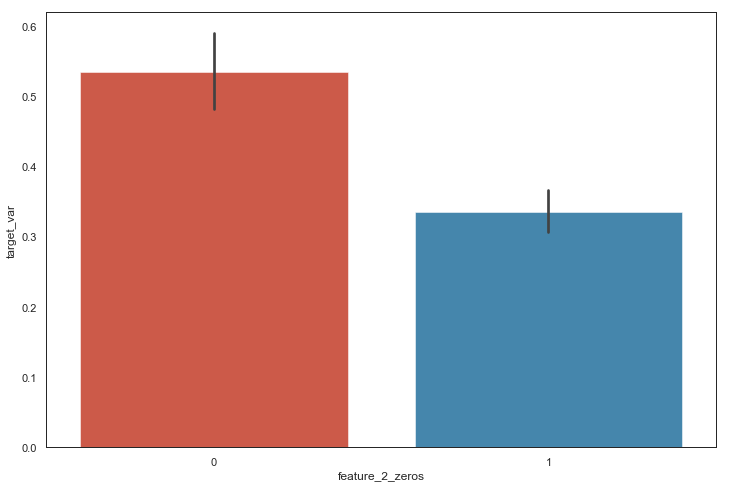

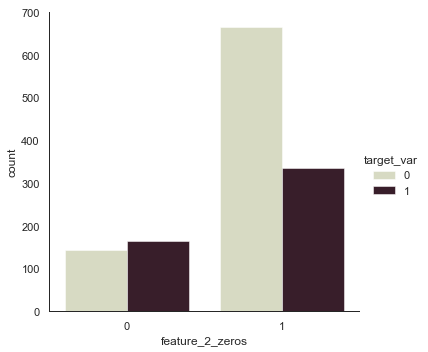

In [122]:
sns.barplot(x = 'feature_2_zeros', y = 'target_var', data=dataset);
sns.catplot(x="feature_2_zeros", kind="count",hue ="target_var",palette="ch:.5", data=dataset);


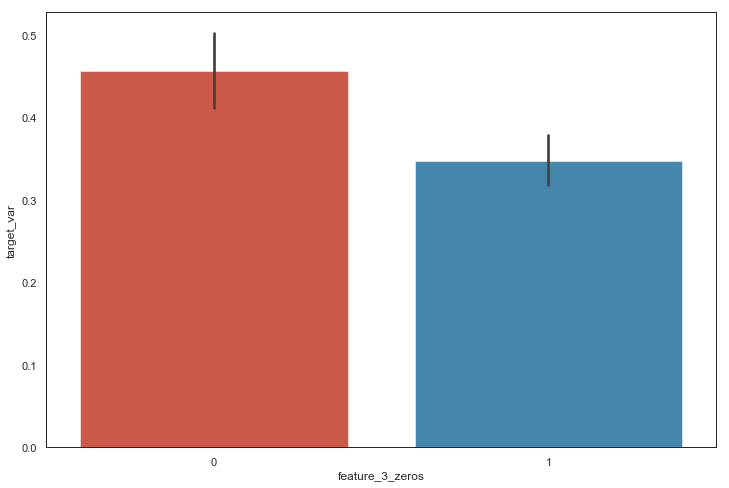

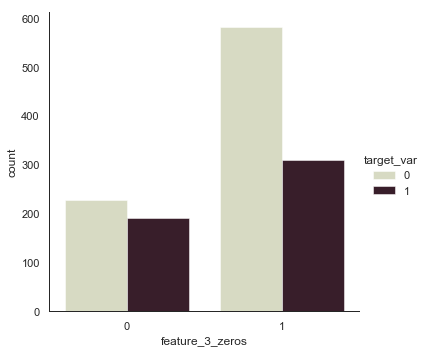

In [123]:
sns.barplot(x = 'feature_3_zeros', y = 'target_var', data=dataset);
sns.catplot(x="feature_3_zeros", kind="count",hue ="target_var",palette="ch:.5", data=dataset);


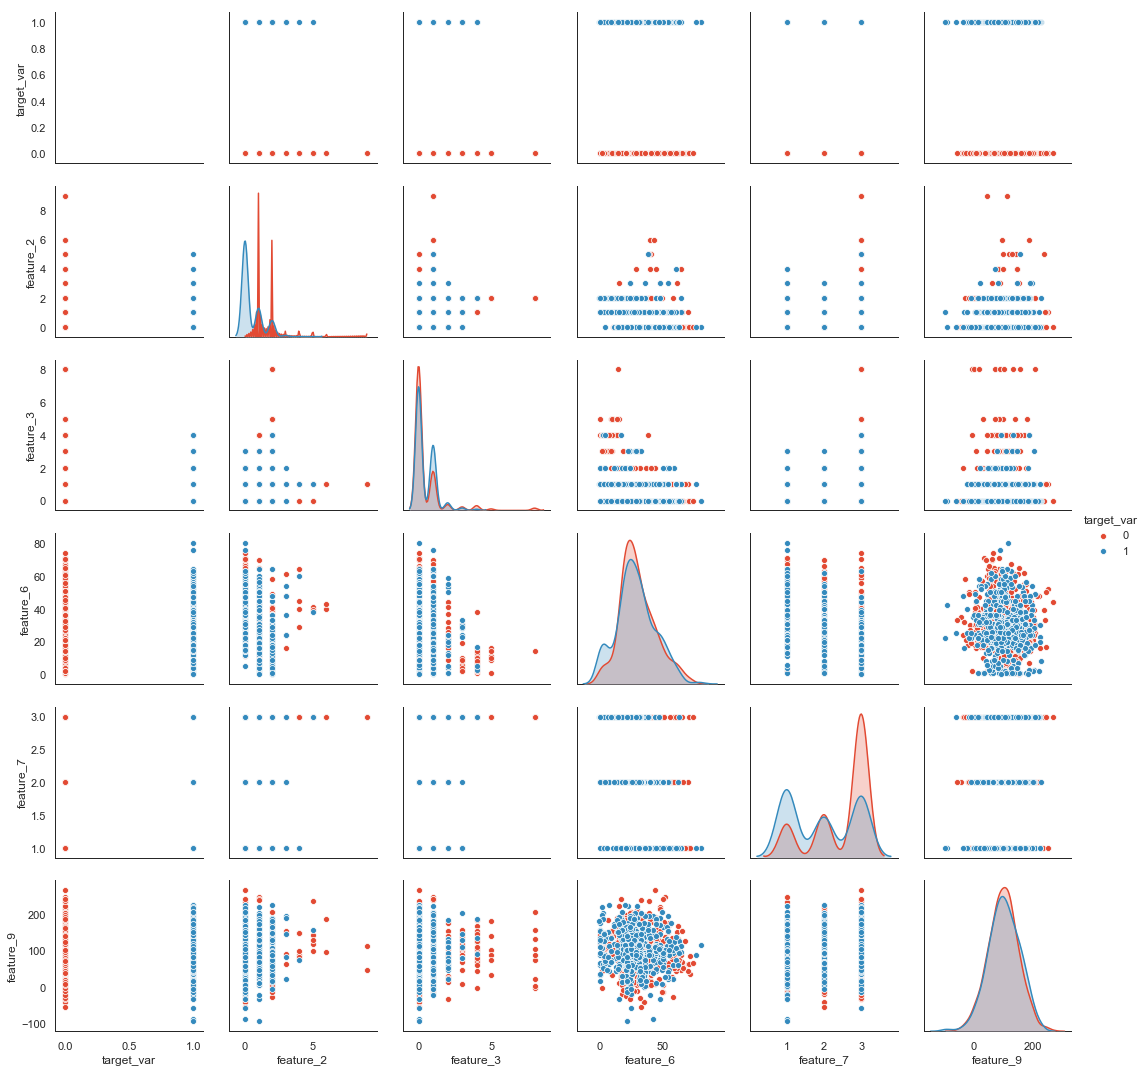

In [124]:
sns.pairplot(dataset, hue='target_var',vars=["target_var", "feature_2","feature_3","feature_6","feature_7","feature_9"]);


# Cleaning



Now that  we understand our data its time to clean it a bit for our models to run smoothly.We will be the using the '3 Cs'  of data cleaning (not necessarily on this order)i.e 

1.Correcting 

- correct for outliers by normalizing the data and replacing all data points outside three standard deviations by the median. By normalisation we create a normal distrubution where 99% of the data is within 3 standard deviations with the 1% being the outliers.

2.Completing

- There are still nulls in the data which we need to either drop the columns or replace the missing value in correcting feature_8,feature_4_numbers,feature_4_numbers_bin,feature_6_bins.For this dataset we will mostly be using the median as the data is heavily skewed using the mean/average will not be truly representative of the population data.We will however delete the other features with more than 50% missing data as we have already extracted the relevant informations through the zero and missing columns.


3.Converting
- Last, but certainly not least, we'll deal with formatting. There are no date or currency formats, but data type formats. Our categorical data imported as objects, which makes it difficult for mathematical calculations. For this dataset, we will convert object data types to categorical dummy variables.

In [125]:
print(dataset.isnull().mean())#checking nulls again


target_var                 0.000000
feature_1                  0.000764
feature_2                  0.000000
feature_3                  0.000000
feature_4                  0.774637
feature_5                  0.000000
feature_6                  0.200917
feature_7                  0.000000
feature_8                  0.001528
feature_9                  0.000000
feature_4_numbers          0.784568
feature_4_names            0.000000
feature_4_numbers_bin      0.784568
feature_1_bins             0.000764
feature_6_bins             0.200917
feature_9_bins             0.000000
feature_1_miss             0.000000
feature_6_miss             0.000000
feature_4_numbers_miss     0.000000
feature_1_zeros            0.000000
feature_2_zeros            0.000000
feature_3_zeros            0.000000
feature_6_zeros            0.000000
feature_4_numbers_zeros    0.000000
dtype: float64


In [126]:
#dataset.dtypes

In [127]:
#COMPLETING
#complete missings buy the median not average if its numercal since most of our columns are skewewd and most frequent if its a category
#....and create indicators so we can see where this missings were later on

#impute missings
dataset['feature_1'].fillna(dataset['feature_1'].median(), inplace = True)
dataset['feature_6'].fillna(dataset['feature_6'].median(), inplace = True)
dataset['feature_6_bins'].fillna(dataset['feature_6_bins'].median (), inplace = True)
dataset['feature_1_bins'].fillna(dataset['feature_1_bins'].median (), inplace = True)






In [128]:
dataset['feature_8']=dataset['feature_8'].fillna(value="sigma")


In [129]:
#CONVERTING
dataset = pd.get_dummies(dataset, columns=['feature_5','feature_8'], prefix = ['feature_5','feature_8'])


#  Feature Engineering

Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data

With good feature engineering we can use less complex models that are faster to run, easier to understand and easier to maintain. This is very desirable.




In [130]:
# lets capture the missing value information in one column i.e sum_missing
dataset=dataset.assign(sum_missing=dataset[['feature_4_numbers_miss','feature_1_miss','feature_6_miss']].sum(1))


In [131]:
#delete the old missing value info
dataset = dataset.drop("feature_4_numbers_miss", axis=1);
dataset = dataset.drop("feature_1_miss", axis=1);
dataset = dataset.drop("feature_6_miss", axis=1);



In [147]:
print(dataset.isnull().mean())#checking nulls again


target_var         0.0
feature_1          0.0
feature_2          0.0
feature_3          0.0
feature_6          0.0
feature_7          0.0
feature_9          0.0
feature_1_bins     0.0
feature_6_bins     0.0
feature_9_bins     0.0
feature_5_blue     0.0
feature_5_pink     0.0
feature_8_gamma    0.0
feature_8_qoph     0.0
feature_8_sigma    0.0
sum_missing        0.0
sum_zeros          0.0
ratio_9to1         0.0
ratio_9to6         0.0
ratio_6to1         0.0
combined_f3f7      0.0
combined_f1f6      0.0
dtype: float64


In [133]:
#lets capture the zeros columns in one column sum zeros
dataset=dataset.assign(sum_zeros=dataset[[ 'feature_1_zeros', 'feature_2_zeros','feature_3_zeros','feature_6_zeros','feature_4_numbers_zeros']].sum(1))


In [140]:
#delete the colomns which we have already used to create the sum_zeros and sum_missing
dataset = dataset.drop("feature_1_zeros", axis=1)
dataset = dataset.drop("feature_2_zeros", axis=1)
dataset = dataset.drop("feature_3_zeros", axis=1)
dataset = dataset.drop("feature_6_zeros", axis=1)


dataset = dataset.drop("feature_4_names", axis=1)
dataset = dataset.drop("feature_4_numbers_zeros", axis=1)
dataset = dataset.drop("feature_4", axis=1)


dataset = dataset.drop("feature_4_numbers", axis=1)
dataset = dataset.drop("feature_4_numbers_bin", axis=1)


One of the key purposes of exploratory data analysis is to see the the distributions and patterns of data to be able to capture that information in ways the models would probably not have.

Other ways which we can we can create new features is by combining existing features through:
* additions(in order to create a column which is more predictive)
* division(in order to create ratios to show the customer behavior change e.g customer salary bill last month divided by bill first month) 
* counts of minimum or maximum customer  behavior ( for example like the time the customer exceed his average monthly bill. However as mentioned before this will be difficult with anonymized dataset but we will give it our best shot.)

In practice most of this feature engineering is done interchangeably  with EDA as see new patterns in the data we create new features to better explain them, so these two processes are often intertwined.

In [145]:
#adding columns that display the same patterns of distrubution of the mean churn rate by doing this we might create 
#.... a more predictive variable which explaines the behaviour of the churners better the single columns on their own

#lets add  feature_3 and feature_7
dataset['combined_f3f7'] = dataset['feature_3'] + dataset['feature_7']  
dataset['combined_f1f6'] = dataset['feature_1_bins'] + dataset['feature_6'] 
dataset['combined_f1f6'].fillna(dataset['combined_f1f6'].median(), inplace = True)# remove missings introduced



In [146]:
# we can also create ratios
dataset['ratio_9to1'] = dataset['feature_9'] + dataset['feature_1']  
dataset['ratio_9to6'] = dataset['feature_9'] + dataset['feature_6']  
dataset['ratio_6to1'] = dataset['feature_6'] + dataset['feature_1']  


In [141]:
dataset.dtypes

target_var           int64
feature_1          float64
feature_2            int64
feature_3            int64
feature_6          float64
feature_7            int64
feature_9          float64
feature_1_bins     float64
feature_6_bins     float64
feature_9_bins       int64
feature_5_blue       uint8
feature_5_pink       uint8
feature_8_gamma      uint8
feature_8_qoph       uint8
feature_8_sigma      uint8
sum_missing          int64
sum_zeros            int64
ratio_9to1         float64
ratio_9to6         float64
ratio_6to1         float64
dtype: object

In [142]:
dataset.head(14)

,target_var,feature_1,feature_2,feature_3,feature_6,feature_7,feature_9,feature_1_bins,feature_6_bins,feature_9_bins,feature_5_blue,feature_5_pink,feature_8_gamma,feature_8_qoph,feature_8_sigma,sum_missing,sum_zeros,ratio_9to1,ratio_9to6,ratio_6to1
0,1,211.3375,0,0,29.0000,1,112.877941,9.0,5.0,5,1,0,0,0,1,0,2,324.215441,141.877941,240.3375
1,1,151.5500,2,1,0.9167,1,60.291423,9.0,0.0,1,0,1,0,0,1,0,0,211.841423,61.208123,152.4667
2,0,151.5500,2,1,2.0000,1,143.794103,9.0,0.0,7,1,0,0,0,1,0,0,295.344103,145.794103,153.5500
3,0,151.5500,2,1,30.0000,1,131.278352,9.0,5.0,7,0,1,0,0,1,0,0,282.828352,161.278352,181.5500
4,0,151.5500,2,1,25.0000,1,204.415716,9.0,3.0,9,1,0,0,0,1,0,0,355.965716,229.415716,176.5500
5,1,26.5500,0,0,48.0000,1,75.970582,6.0,8.0,2,0,1,0,0,1,0,2,102.520582,123.970582,74.5500
6,1,77.9583,0,1,63.0000,1,125.853521,8.0,9.0,6,1,0,0,0,1,0,1,203.811821,188.853521,140.9583
7,0,0.0000,0,0,39.0000,1,103.637401,0.0,7.0,5,0,1,0,0,1,0,3,103.637401,142.637401,39.0000
8,1,51.4792,0,2,53.0000,1,94.425637,8.0,9.0,4,1,0,0,0,1,0,1,145.904837,147.425637,104.4792
9,0,49.5042,0,0,71.0000,1,85.687636,8.0,9.0,3,0,1,1,0,0,1,2,135.191836,156.687636,120.5042


# Modelling

NO FREE LUNCH

The “No Free Lunch” Theorem (Wolpert 1996) is the idea that, without any specific knowledge of the problem or data at hand, no one predictive model can be said to be the best. There are many models that are optimized for some data characteristics (such as missing values or collinear predictors). In these situations, it might be reasonable to assume that they would do better than other models (all other things being equal). In practice, things are not so simple. One model that is optimized for collinear predictors might be constrained to model linear trends in the data and is sensitive to missingness in the data. It is very difficult to predict the best model especially before the data are in hand.

So we are going to train  multiple models and  choose the one which captures the most positive classes as this is our main objective because the business losses more if these churners are not detected.

Our main objective at this step is to build the best model which captures the most positive classes(churners) as these are more costly to BLT if we fail to capture them. So we will build multiple models after we grid search their best parameters that maximize recall. We are also required to prove quantitatively if the model has not overfit.This means making sure the model generalises well on unseen data and does not memorize only the existing dataset it was trained on.

We will mainly use tree based ensemble methods as they are not to correlations, multicollinearity, scale and outliers.They have also been empirically proven to be better than linear models in many Kaggle competitions.

In [143]:
dataset.columns# column names

Index(['target_var', 'feature_1', 'feature_2', 'feature_3', 'feature_6',
       'feature_7', 'feature_9', 'feature_1_bins', 'feature_6_bins',
       'feature_9_bins', 'feature_5_blue', 'feature_5_pink', 'feature_8_gamma',
       'feature_8_qoph', 'feature_8_sigma', 'sum_missing', 'sum_zeros',
       'ratio_9to1', 'ratio_9to6', 'ratio_6to1'],
      dtype='object')

In [148]:
#subset a dataset with binned varuables only whixh we can use in another version and check which one perfoms better
dataset_binned = dataset[['target_var', 'feature_1_bins','feature_2','feature_3','feature_5_blue',
                          'feature_5_pink','feature_8_gamma','feature_8_qoph','feature_8_sigma','feature_6_bins',
                          'feature_7','feature_9_bins','sum_missing','sum_zeros','combined_f3f7','combined_f1f6']] 




In [150]:
#subset only numeric which we will use initially as most tree models prefer this
dataset_v1 = dataset[['target_var', 'feature_1','feature_2','feature_3','feature_6','feature_7',
                      'feature_8_qoph','feature_5_blue','feature_5_pink','feature_8_gamma','feature_9',
                      'feature_8_qoph','feature_8_sigma','sum_missing','sum_zeros','combined_f1f6','combined_f3f7',
                       'ratio_9to1','ratio_9to6','ratio_6to1']
       
      ]


In [152]:
dataset_v1.shape

(1309, 20)

In [158]:
#separing the indipendent variables from the dependent variable
X = dataset_v1.iloc[:, 1:20].values
y = dataset_v1.iloc[:, 0].values

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=4321)


In [159]:
X_train.shape

(1047, 19)

In [193]:
#importing the modelling packages
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from yellowbrick.classifier import DiscriminationThreshold
from yellowbrick.classifier import *



Random Forest Model
The building block of a random forest are decision trees.At a decision tree is at a very simple level is a series of "if else" steps up until a decision is made at the very end(leaf node). A random forest now grows a forest of these decision trees in order to reduce VARIANCE as each tree is built on a different random subset of the dataset(bagging) and  best split for each subset is chosen at every level.

Steps to taken the modeling process

1. Select a model and use a cross validation grid search which looks for the best parameters on various subsets of the data

In [162]:
#building the class of the model Random forest and setting the random state for reproducebility
rfc=RandomForestClassifier(random_state=42)


In [163]:
#creating a search space
param_grid = { 
    'n_estimators': [50, 100,150,250,300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


In [164]:
#grid search the model parameters across 4 K_Folds cross validations too avoid over fitting and P_hacking optimizing on recall
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 4,scoring= 'recall')


In [165]:
#fit the random forest model and use it to predict the test
CV_rfc.fit(X_train, y_train)
rfc_prediction = CV_rfc.predict(X_test)


In [166]:
#check the best parameteres
CV_rfc.best_params_


{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 50}

In [167]:
# lets evaluate the model with some common evaluation metrics, the key one we are tracking remember is the recall which shows..
#....percantage of the positive class correctly prectly predicted out of the the total positive classs population
print(recall_score(y_test, rfc_prediction))
print(accuracy_score(y_test, rfc_prediction))
print(precision_score(y_test, rfc_prediction))

0.64
0.7977099236641222
0.7901234567901234


lets empirically  prove that our model has no over fit on the test data and can generalize well on unseen data by doing 2 fold cross validation.

In [169]:
print (cross_val_score(CV_rfc, X_train, y_train, cv=2, scoring='recall'))

[0.615 0.675]


In [ ]:
#check the best parametres
print(CV_rfc.best_params_)

The Gradient Boosting Model

In [172]:
#gradient boosting model
#searching parametres using grid search cross validation
parameters_gbm = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.075, 0.1, 0.2,0.4],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    }

gbm_clf = GridSearchCV(GradientBoostingClassifier(), parameters_gbm, cv=2, n_jobs=-1,scoring= 'recall')

In [173]:
gbm_clf.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'loss': ['deviance'], 'learning_rate': [0.01, 0.025, 0.075, 0.1, 0.2, 0.4], 'min_samples_split': array([0.1    , 0.13636, 0.17273, 0.20909, 0.24545, 0.28182, 0.31818,
       0.35455, 0.39091, 0.42727, 0.46364, 0.5    ]), 'min_samples_leaf': array([0.1    , 0.13636, 0.17273, 0.20909, 0.24545, 0.28182, 0.31818,
       0.35455, 0.39091, 0.42727, 0.46364, 0.5    ]), 'max_depth': [3, 5, 8], 'max_features': ['

In [176]:
#fit the random forest model best on the best parameteres
gbm_prediction = gbm_clf.predict(X_test)


In [177]:
#check best paramteres
gbm_clf.best_params_


{'criterion': 'mae',
 'learning_rate': 0.075,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 0.17272727272727273,
 'min_samples_split': 0.5}

In [178]:
#evaluation metrics
print(recall_score(y_test, gbm_prediction))
print(accuracy_score(y_test, gbm_prediction))
print(precision_score(y_test, gbm_prediction))

0.7
0.7786259541984732
0.7142857142857143


In [179]:
#test if the model hasnt overfit by doing a 2 fold cross validation 
#this was however computer intensvive I later resolved to just to test if the final best model was overfit
#print (cross_val_score(gbm_clf, X_train, y_train, cv=2, scoring='recall'))

In [183]:
#EXtraTreesClassifier
#search for parameteres
param_extra = { 
    'n_estimators': [25,50, 100,150,250,300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
extra_clf = GridSearchCV(ExtraTreesClassifier(), param_extra, cv=2,scoring= 'recall')

In [184]:
#fit the EXtraTreesClassifier model
extra_clf.fit(X_train, y_train)

extra_prediction = extra_clf.predict(X_test)


In [185]:
#check best paramteres
extra_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 25}

In [186]:
#evaluation metrics
print(recall_score(y_test, extra_prediction))
print(accuracy_score(y_test, extra_prediction))
print(precision_score(y_test, extra_prediction))

0.67
0.7938931297709924
0.7613636363636364


In [187]:
#test if the model hasnt overfit by doing a 2 fold cross validation
print (cross_val_score(extra_clf, X_train, y_train, cv=2, scoring='recall'))

[0.64 0.72]


## Improving the Recall

Our models are consistently failing to capture the target class(churners) as they capturing more the non event which is far less because it cost BLT more if they dint capture the churners. To remedy this we have two options:

1.Since this is an imbalanced dataset with more non-events than positive events(62% to 38%) we can over sample the target event (churners) to give the models more target event data to train on. Note that we do not oversample the test set, we keep it exactly as the same to avoid creating conditions which are not applicable in the real world. There is a whole subset of data science dedicated for this field.The most popular one is SMOTE
At a high level, SMOTE creates synthetic observations of the minority class (churners) by:

Finding the k-nearest-neighbors for minority class observations (finding similar observations)
Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observation.

However this process is computationally expensive, so we will not be doing it in the limited time  I have. 

2.Another way we could try is to assign class weights on the minority class
 
3.We can also lower our probability thresh hold cut off which classifies between the target event and the non target. This will help to capture more target events which would otherwise have been not discarded at the default 50% thresh hold . In our scenario this would take us to the simplistic model which has has cutoff 0% and classifies everything as the positive class. In the real world this will probably not work.

Lets try the last two:



CLASS WEIGHT BALANCING


The second method, adjusting class weights, penalizes the model for misclassifying the minority class. As a result, the model will produce larger errors for misclassification of the minority class and learn to correct for imbalance.

Lets build the second round of models with the class weight balanced

In [188]:
#Random Forest with class weight balanced
rfc_v2=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [50, 100,150,250,300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'class_weight':["balanced"],
    'criterion' :['gini', 'entropy']
}
CV_rfc_v2 = GridSearchCV(estimator=rfc_v2, param_grid=param_grid, cv= 2,scoring= 'recall')


In [189]:
#fit the model
CV_rfc_v2.fit(X_train, y_train)
rfc_prediction_v2 = CV_rfc_v2.predict(X_test)


In [190]:
#check best parameters
CV_rfc_v2.best_params_


{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 300}

In [191]:
#evaluation metrics on class weight
print(recall_score(y_test, rfc_prediction_v2))
print(accuracy_score(y_test, rfc_prediction_v2))
print(precision_score(y_test, rfc_prediction_v2))

0.72
0.7977099236641222
0.7422680412371134


Lets also try the other option of lowering the probability thresh hold to capture more positive classes as false negatives are more costly to the business

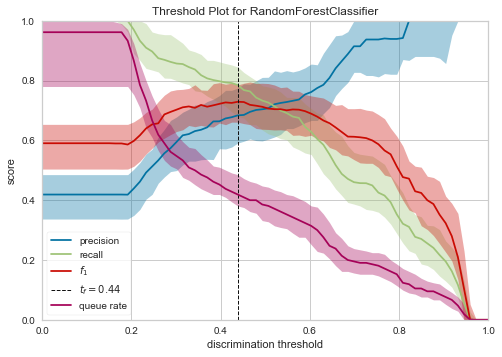

In [194]:
# Instantiate the classification model and visualizer
visualizer_rfc_v2 = DiscriminationThreshold(RandomForestClassifier(n_estimators=300, max_depth=4,criterion='gini', 
class_weight= 'balanced',random_state=42))

visualizer_rfc_v2.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer_rfc_v2.poof()     

In [1442]:
#lets choose the the probability cutoff point with the highest recall and highest f1 score which is
#...in simple terms a weighted average of both the recall and precision.From the above graph the threshhold cutoff is about 0.25
#evaluation metrics on class weight and probability th = 0.25

print(recall_score(y_test, rfc_prediction_v3))
print(accuracy_score(y_test, rfc_prediction_v3))
print(precision_score(y_test, rfc_prediction_v3))

0.9174311926605505
0.7442748091603053
0.6329113924050633


Great!!!!!!!!!!!!!Our recall is now 91.7%. Lets check the other models for interest sake.......

In [ ]:
# Instantiate the gradient boosting classification model and visualizer
visualizer_rfc_v2 = DiscriminationThreshold(RandomForestClassifier(n_estimators=300, max_depth=4,criterion='gini', 
class_weight= 'balanced',random_state=42))

visualizer_rfc_v2.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer_rfc_v2.poof()     

In [1447]:
#lower the probability threshold
gbm_pred_= (gbm_clf_v2.predict_proba(X_test)[:,1] >= 0.25).astype(bool) # set threshold as 0.25

In [1448]:
#evaluation metrics on class weight and prob = 0.25

print(recall_score(y_test, gbm_pred_v2))
print(accuracy_score(y_test, gbm_pred_v2))
print(precision_score(y_test, gbm_pred_v2))

0.8807339449541285
0.7938931297709924
0.7007299270072993


Also great at 88% and a very good Accuracy of 79% and precision of 70%

In [195]:
#EXtraTreesClassifier
#search for parameteres with classs weight balanced
param_extra_v2 = { 
    'n_estimators': [25,50, 100,150,250,300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5,6,7,8],
    'class_weight':["balanced"],

    'criterion' :['gini', 'entropy']
}
extra_clf_v2 = GridSearchCV(ExtraTreesClassifier(), param_extra_v2, cv=4, n_jobs=-1,scoring= 'recall')

In [196]:
# train the model
extra_clf_v2.fit(X_train, y_train)


GridSearchCV(cv=4, error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [25, 50, 100, 150, 250, 300], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [3, 4, 5, 6, 7, 8], 'class_weight': ['balanced'], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [197]:
#predict on test set
extra_prediction_v2 = extra_clf_v2.predict(X_test)


In [199]:
#best parametres
extra_clf_v2.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 25}

In [200]:
#evaluation metrics ExtraTrees with class weight balance
print(recall_score(y_test, extra_prediction_v2))
print(accuracy_score(y_test, extra_prediction_v2))
print(precision_score(y_test, extra_prediction_v2))

0.74
0.8129770992366412
0.7628865979381443


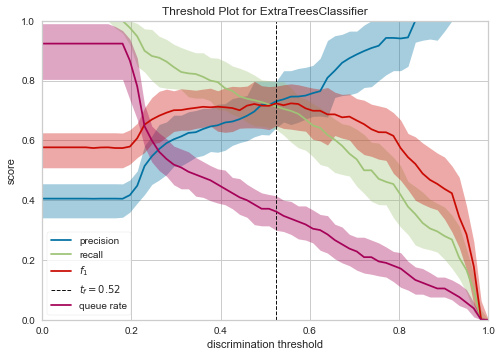

In [201]:
#lets first view the model classification threshhold levels
# Instantiate the classification model and visualizer
visualizer_extra_clf_v3= DiscriminationThreshold(ExtraTreesClassifier(n_estimators=50, max_depth=6,criterion='gini', 
class_weight= 'balanced',random_state=0))

visualizer_extra_clf_v3.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer_extra_clf_v3.poof()     

In [214]:
extra_pred_v3 = (extra_clf_v2.predict_proba(X_test)[:,1] >= 0.29).astype(bool) # set threshold as 0.29 after trying different cutoffs

In [215]:
#evaluation metrics
print(recall_score(y_test, extra_pred_v3))
print(accuracy_score(y_test, extra_pred_v3))
print(precision_score(y_test, extra_pred_v3))

0.88
0.7595419847328244
0.6330935251798561


CONCLUSION

# Actionable Insights

More often in practice the objective of predictive modeling doesn't just stop at predicting the target event but we would want to understand the drivers behind it. If we can understand these drivers perhaps we can address churn much earlier by setting triggers.

Lets start by looking at feature importance in our models

None


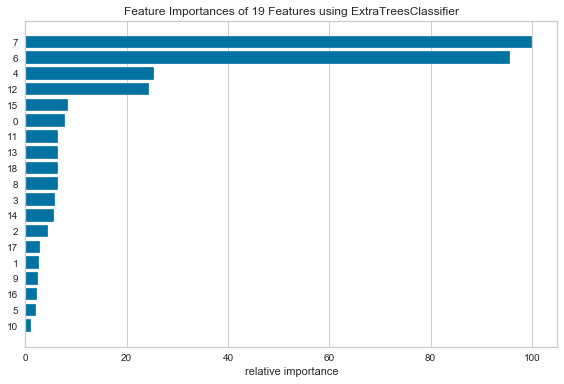

In [231]:
from yellowbrick.features.importances import FeatureImportances

# Create a new matplotlib figure
fig = plt.figure()
ax = fig.add_subplot()

viz = FeatureImportances(ExtraTreesClassifier(n_estimators=50, max_depth=6,criterion='gini', 
class_weight= 'balanced',random_state=0), ax=ax)
viz.fit(X_train, y_train)

viz.poof()

In [247]:
#print(dataset_v1.columns)
#dataset_v1.index.name
print(dataset_v1.iloc[0, 1:20])


feature_1          211.337500
feature_2            0.000000
feature_3            0.000000
feature_6           29.000000
feature_7            1.000000
feature_8_qoph       0.000000
feature_5_blue       1.000000
feature_5_pink       0.000000
feature_8_gamma      0.000000
feature_9          112.877941
feature_8_qoph       0.000000
feature_8_sigma      1.000000
sum_missing          0.000000
sum_zeros            2.000000
combined_f1f6       38.000000
combined_f3f7        1.000000
ratio_9to1         324.215441
ratio_9to6         141.877941
ratio_6to1         240.337500
Name: 0, dtype: float64


Feature ranking:
1. feature 7 (0.268513)
2. feature 6 (0.248616)
3. feature 0 (0.080980)
4. feature 4 (0.066239)
5. feature 12 (0.065663)
6. feature 18 (0.043672)
7. feature 15 (0.041771)
8. feature 3 (0.031110)
9. feature 14 (0.027936)
10. feature 16 (0.020917)
11. feature 2 (0.018961)
12. feature 17 (0.018289)
13. feature 9 (0.016277)
14. feature 13 (0.015133)
15. feature 11 (0.011974)
16. feature 8 (0.010743)
17. feature 1 (0.009557)
18. feature 10 (0.002125)
19. feature 5 (0.001525)


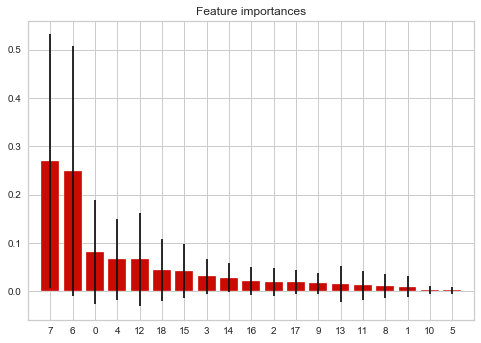

In [225]:
importances = CV_rfc_v2.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in CV_rfc_v2.best_estimator_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


In [221]:
importances = CV_rfc_v2.best_estimator_.feature_importances_
importances

array([0.08098027, 0.00955704, 0.01896065, 0.03110965, 0.06623874,
       0.00152532, 0.24861647, 0.26851265, 0.01074315, 0.01627695,
       0.00212453, 0.01197356, 0.06566305, 0.01513341, 0.02793564,
       0.04177068, 0.02091709, 0.01828887, 0.04367226])

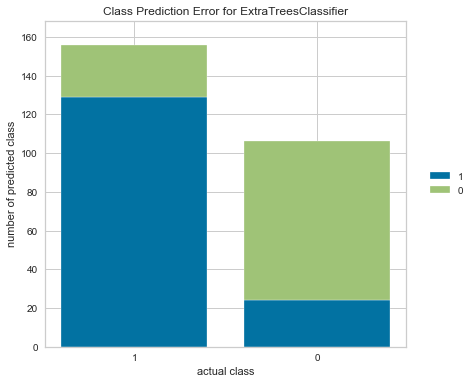

In [1471]:
from yellowbrick.classifier import ClassPredictionError
classes = ["1", "0"]

# Instantiate the classification model and visualizer
visualizer_classes = ClassPredictionError(
    ExtraTreesClassifier(n_estimators=50, max_depth=6,criterion='gini', 
class_weight= 'balanced',random_state=0), classes=classes
)

# Fit the training data to the visualizer
visualizer_classes.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer_classes.score(X_test, y_test)

# Draw visualization
g = visualizer_classes.poof()

In [242]:
# Features importances
importances = CV_rfc_v2.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in CV_rfc_v2.best_estimator_],
             axis=0)
indices = np.argsort(importances)[::-1]
feature_list = [X.columns[indices[f]] for f in range(X.shape[1])]  #names of features.
ff = np.array(feature_list)

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f) name: %s" % (f + 1, indices[f], importances[indices[f]], ff[indices[f]]))


# Plot the feature importances of the forest
plt.figure()
plt.rcParams['figure.figsize'] = [16, 6]
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), ff[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()




AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
importances = CV_rfc_v2.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in CV_rfc_v2.best_estimator_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


In [13]:
## The new additions to get feature importance to classes: 

# To get the importance according to each class:
def class_feature_importance(X, Y, feature_importances):
    N, M = X.shape
    X = scale(X)

    out = {}
    for c in set(Y):
        out[c] = dict(
            zip(range(N), np.mean(X[Y==c, :], axis=0)*feature_importances)
        )

    return out


NameError: name 'RandomForestClassifier' is not defined

In [1485]:
from rulefit import RuleFit

rf = RuleFit(extr)



In [243]:
features = ('feature_1','feature_2','feature_3','feature_6','feature_7',
                      'feature_8_qoph','feature_5_blue','feature_5_pink','feature_8_gamma','feature_9',
                      'feature_8_qoph','feature_8_sigma','sum_missing','sum_zeros','combined_f1f6','combined_f3f7')
       
      


In [11]:
features.index

<function tuple.index>

In [12]:
importances = extr.feature_importances_

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

NameError: name 'extr' is not defined

In [1487]:
rf.fit(X_train, y_train, feature_names=features)


TypeError: unsupported operand type(s) for /: 'int' and 'RandomForestClassifier'

In [719]:
rf.fit(X_train, y_train,feature_names=features)

TypeError: unsupported operand type(s) for /: 'int' and 'GradientBoostingRegressor'

In [720]:
import xgboost
import shap


In [729]:
xgb_model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X_train, label=y_train), 100);


[09:57:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[09:57:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[09:57:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[09:57:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[09:57:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[09:57:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[09:57:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

In [732]:
import xgboost as xgb


In [743]:
xgbm = xgb.XGBClassifier(max_depth=6, n_estimators=200, learning_rate=0.02).fit(X_train, y_train)


In [734]:
predictions = xgbm.predict(X_train)

In [ ]:
#X_v1_train,X_v1_test, y_v1_train, y_v1_test = train_test_split(X_test, y_test, test_size=0.5)


In [736]:
from sklearn.metrics import *


In [741]:
recall_xgb_test=recall_score(y_v1_train, predictions)
recall_xgb_test

0.5514018691588785

In [742]:
recall_xgb_validation=recall_score(y_v1_test, predictions)
recall_xgb_validation

0.20192307692307693

In [747]:
xgb_b = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 200)

In [749]:
xgb_b.fit(X_train,y_train)

preds = xgb_b.predict(X_v1_test)

In [751]:
recall_score_xgb=accuracy_score(y_v1_train, preds)
recall_score_xgb

0.49236641221374045

In [738]:
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X)


In [727]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
dt1 = DecisionTreeRegressor()
dt1.fit(top5x, top5y)

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt1, out_file=dot_data,  
               filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())